In [1]:
import pandas as pd
pd.options.display.max_columns = 500

In [2]:
df1 = pd.read_csv('C:\\Users\\Shrita\\Desktop\\Career-recomendation-system\\Codes\\notebooks\\job_rec.csv')

In [3]:
df1

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...",NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \r\...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\r\...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,"Yerevan, Armenia",A tech startup of Technolinguistics based in N...,- Work closely with product and business teams...,- At least 5 years of experience in Interface/...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,"Yerevan, Armenia",NaN,- Establish and manage Category Management dev...,"- University degree, ideally business related;...",NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,"Yerevan, Armenia",NaN,"- Develop, establish and maintain marketing st...","- Degree in Business, Marketing or a related f...",NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San La

In [4]:
df1.shape

(19001, 24)

In [5]:
df1.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [6]:
df1.isnull().sum()

jobpost                 0
date                    0
Title                  28
Company                 7
AnnouncementCode    17793
Term                11325
Eligibility         14071
Audience            18361
StartDate            9326
Duration             8203
Location               32
JobDescription       3892
JobRequirment        2522
RequiredQual          484
Salary               9379
ApplicationP           60
OpeningDate           706
Deadline               65
Notes               16790
AboutC               6531
Attach              17442
Year                    0
Month                   0
IT                      0
dtype: int64

<AxesSubplot:>

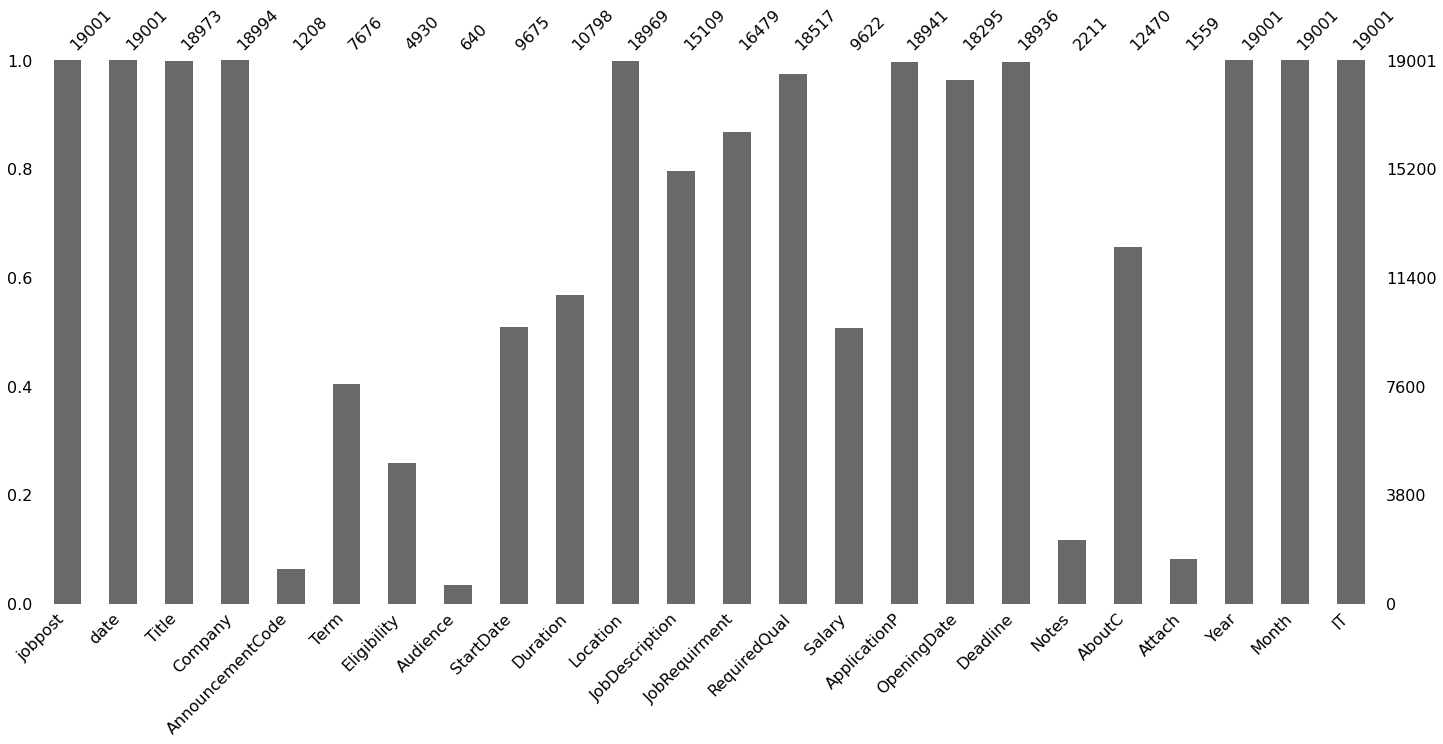

In [7]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import missingno as msno
msno.bar(df1)


In [8]:
df1 = df1[df1['IT'] == True]

In [9]:
df1.shape

(3759, 24)

In [10]:
col = ['RequiredQual', 'Eligibility', 'Title', 'JobDescription', 'JobRequirment']
df1 = df1[col]

In [11]:
df1.isnull().sum()/3759 * 100

RequiredQual       0.159617
Eligibility       84.304336
Title              0.000000
JobDescription    10.667731
JobRequirment     15.429636
dtype: float64

In [12]:
df1['Title'].value_counts()

Software Developer                                        134
Web Developer                                             101
Java Developer                                             88
Graphic Designer                                           75
Senior Java Developer                                      69
                                                         ... 
Java/C++ Developer for Lycos Mail                           1
Senior ASP.NET/ MVC  Developer                              1
MSE and Corporate Banking Department Credit Specialist      1
IT Administrator for Linux                                  1
Senior Developer Ad Technology                              1
Name: Title, Length: 1272, dtype: int64

In [13]:
df1['JobRequirment'].value_counts()

- Participate in application design;\r\n- Provide necessary technical and design documentation;\r\n- Communicate effectively with local management and external team\r\nmembers;\r\n- Develop features according to technical specifications.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [14]:
df1['Title'].value_counts().head(30)

Software Developer                                     134
Web Developer                                          101
Java Developer                                          88
Graphic Designer                                        75
Senior Java Developer                                   69
Software Engineer                                       69
PHP Developer                                           65
Senior Software Engineer                                63
Programmer                                              56
IT Specialist                                           55
Senior QA Engineer                                      43
Senior Software Developer                               41
Android Developer                                       37
.NET Developer                                          36
Senior .NET Developer                                   34
Senior PHP Developer                                    34
iOS Developer                                           

In [15]:
def repl(title):
    tokens = title.split()
    for i,x in enumerate(tokens):
        if x == 'Senior':
            tokens = tokens[1:]
        elif x == 'Junior':
            tokens = tokens[1:]
            
    title2 = ' '.join(tokens)
    return title2

df1['Title'] = df1['Title'].apply(lambda x: repl(x))

In [16]:
df1['Title'].value_counts()

Software Developer                      181
Java Developer                          165
Software Engineer                       141
Web Developer                           132
PHP Developer                           103
                                       ... 
Java/ Grails Developer                    1
Software Developer/ Technical Leader      1
C#.Net Backend Developer                  1
Application Developer                     1
Contractor, Database Department           1
Name: Title, Length: 1126, dtype: int64

In [17]:

def repl(s):
    if 'C++ Software Developer' in s:
        s = s.replace('C++ Software Developer', 'C++ Developer')
    elif ('Quality Assurance Engineer' in s) or ('Software QA Engineer' in s):
        s = s.replace('Quality Assurance Engineer', 'QA Engineer')
        s = s.replace('Software QA Engineer', 'QA Engineer')
    elif '.Net Developer' in s:
        s = s.replace('.Net Developer', '.NET Developer')
    elif 'Java Software Developer' in s:
        s = s.replace('Java Software Developer', 'Java Developer')
    elif 'Senior Software Developer' in s:
        s = s.replace('Senior Software Developer', 'Software Developer')
    elif 'Database Administrator' in s:
        s = s.replace('Database Administrator', 'Database Developer')
    elif 'PHP Software Developer' in s:
        s = s.replace('PHP Software Developer', 'PHP Developer')
    elif '.NET Software Developer' in s:
        s = s.replace('.NET Software Developer', '.NET Developer')
    elif 'Java Software Engineer' in s:
        s = s.replace('Java Software Engineer', 'Java Developer')
    elif ('C#.NET Developer' in s) or ('C# .NET Developer' in s):
        s = s.replace('C#.NET Developer', '.NET Developer')
        s = s.replace('C# .NET Developer', '.NET Developer')
    elif 'ASP.NET Developer' in s:
        s = s.replace('ASP.NET Developer', 'Java Developer')
    
        
    else:
        pass
    
    return s



df1['Title'] = df1['Title'].apply(lambda x: repl(x))

In [18]:
df1['Title'].value_counts()

Java Developer                          239
Software Developer                      214
Software Engineer                       141
Web Developer                           132
.NET Developer                          122
                                       ... 
NPL Unit Specialist                       1
Linux System Administrator                1
Java/ Grails Developer                    1
Software Developer/ Technical Leader      1
Contractor, Database Department           1
Name: Title, Length: 1103, dtype: int64

In [19]:
df1['Title'].value_counts().head(50)

Java Developer                                   239
Software Developer                               214
Software Engineer                                141
Web Developer                                    132
.NET Developer                                   122
PHP Developer                                    116
QA Engineer                                      107
Graphic Designer                                  78
Database Developer                                69
Android Developer                                 60
Programmer                                        58
IT Specialist                                     56
iOS Developer                                     54
C++ Developer                                     41
Senior Developer/ Architect                       28
Network Administrator                             27
Software Engineer, Deep Submicron Department      26
ASP.NET Developer                                 24
IT Manager                                    

In [20]:
classes = df1['Title'].value_counts()[:14]
keys = classes.keys().to_list()

df1 = df1[df1['Title'].isin(keys)]
df1['Title'].value_counts()

Java Developer        239
Software Developer    214
Software Engineer     141
Web Developer         132
.NET Developer        122
PHP Developer         116
QA Engineer           107
Graphic Designer       78
Database Developer     69
Android Developer      60
Programmer             58
IT Specialist          56
iOS Developer          54
C++ Developer          41
Name: Title, dtype: int64

In [21]:
df1.shape

(1487, 5)

In [22]:
df1.isnull().sum()/1487 * 100

RequiredQual       0.000000
Eligibility       83.658373
Title              0.000000
JobDescription     8.540686
JobRequirment     15.400134
dtype: float64

In [23]:
#dropping eligibility because more than 30% of the values are missing
df1.drop('Eligibility' , axis=1 , inplace =True)

In [24]:
df1.shape

(1487, 4)

In [25]:
df1.columns

Index(['RequiredQual', 'Title', 'JobDescription', 'JobRequirment'], dtype='object')

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1['title_le'] = le.fit_transform(df1['Title'])

In [27]:
df1

,RequiredQual,Title,JobDescription,JobRequirment,title_le
4,- University degree; economical background is ...,Software Developer,NaN,- Rendering technical assistance to Database M...,10
19,"As a GD you are creative, innovative and have\...",Graphic Designer,The position of Graphic Designer (GD) demands ...,Graphic Designer will be responsible for every...,4
35,- Work experience of at least two years; \r\n-...,Programmer,NaN,NaN,8
76,- Professional background in graphic design;\r...,Graphic Designer,Ameria CJSC is seeking qualified candidates fo...,- Design of company production packaging;\r\n-...,4
92,"- Degree in Computer Science, Information Tech...",Software Developer,"Synergy International Systems, Inc./Armenia se...",Specific tasks and key responsibilities includ...,10
...,...,...,...,...,...
18965,"- In-depth knowledge of modern HTML, CSS, Java...",Web Developer,Dasaran.am is looking for a Senior Web Develop...,"- Write a well designed, testable, efficient c...",12
18968,"- In-depth knowledge of modern HTML, CSS, Java...",Web Developer,Dasaran.am is looking for a Senior Web Develop...,"- Write a well designed, testable, efficient c...",12
18973,"- Strong Java skills;\r\n- Excellence in J2EE,...",Java Developer,In this role the incumbent will be responsible...,- Responsible for developing and building high...,6
18990,"- Master's degree in IT, Engineering or a rela...",Java Developer,NASDAQ OMX Armenia is seeking an energetic Jav...,- Responsible for developing and building high...,6


In [28]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        # lemmatize text - convert to base form 
        self.wnl = WordNetLemmatizer()
        # creating stopwords list, to ignore lemmatizing stopwords 
        self.stopwords = stopwords.words('english')
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if t not in self.stopwords]

# removing new line characters, and certain hypen patterns                  
df1['RequiredQual']=df1['RequiredQual'].apply(lambda x: x.replace('\n', ' ').replace('\r', '').replace('- ', ''). replace(' - ', ' to '))

In [29]:
import nltk
from nltk.tokenize import word_tokenize

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
y = df1['title_le']
X = df1['RequiredQual']
vectorizer = TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english')
vectorizer.fit(X)
tfidf_matrix = vectorizer.transform(X)

X_tdif = tfidf_matrix.toarray()
X_train_words, X_test_words, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

X_train = vectorizer.transform(X_train_words)
X_train = X_train.toarray()

X_test = vectorizer.transform(X_test_words)
X_test = X_test.toarray()

In [31]:
X

4        University degree; economical background is a ...
19       As a GD you are creative, innovative and have ...
35       Work experience of at least two years;  Knowle...
76       Professional background in graphic design; Str...
92       Degree in Computer Science, Information Techno...
                               ...                        
18965    In-depth knowledge of modern HTML, CSS, JavaSc...
18968    In-depth knowledge of modern HTML, CSS, JavaSc...
18973    Strong Java skills; Excellence in J2EE, Spring...
18990    Master's degree in IT, Engineering or a relate...
18992    2 5 years of experience in software developmen...
Name: RequiredQual, Length: 1487, dtype: object

In [32]:
y

4        10
19        4
35        8
76        4
92       10
         ..
18965    12
18968    12
18973     6
18990     6
18992     0
Name: title_le, Length: 1487, dtype: int32

In [33]:
from sklearn.mixture import GaussianMixture

from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7008928571428571

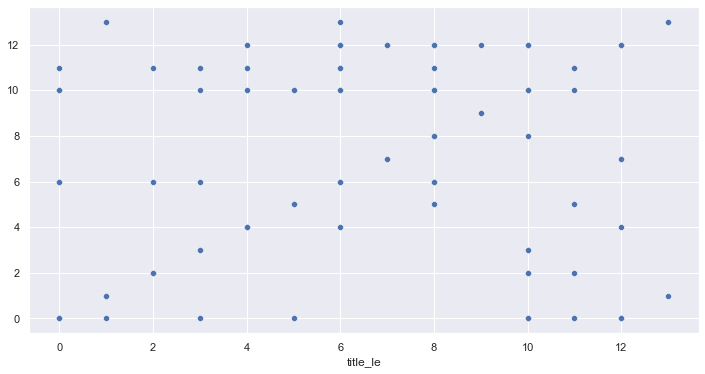

In [35]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,6)})
# sns.(y_test, y_pred)
sns.scatterplot(y_test, y_pred)
plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7991071428571429

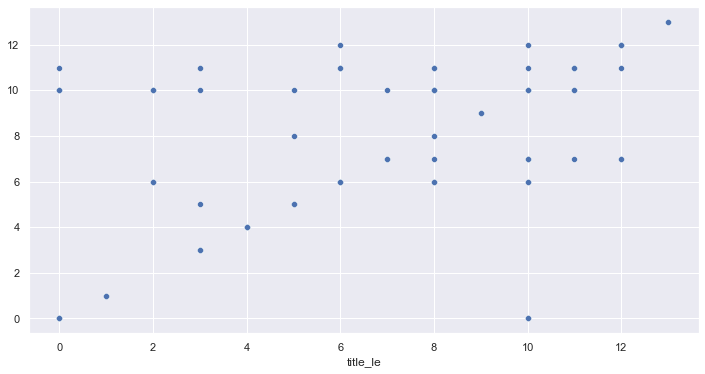

In [38]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,6)})
# sns.(y_test, y_pred)
sns.scatterplot(y_test, y_pred)
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 10, max_features = 5, min_samples_leaf = 4,min_samples_split = 10,n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.35267857142857145

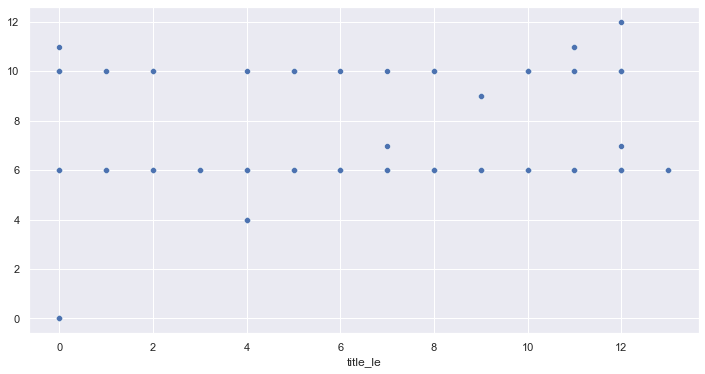

In [40]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,6)})
sns.scatterplot(y_test, y_pred)
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30,40],
    'max_features': [3,4,5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500,1000]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [42]:
grid_search.fit(X_train, y_train)
grid_search.best_params_                                

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 11.9min finished


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 30, max_features = 5, min_samples_leaf = 3,min_samples_split = 10,n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.41964285714285715

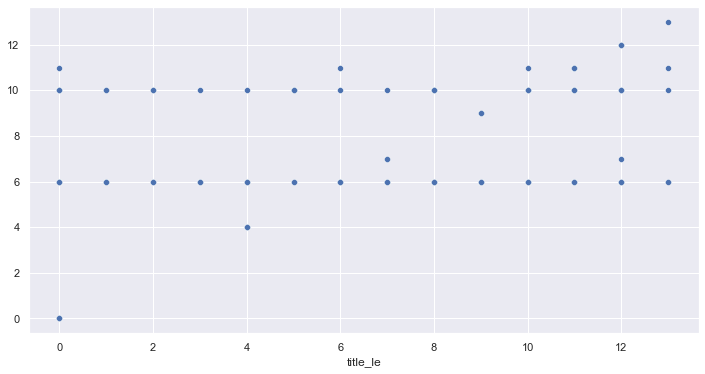

In [45]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,6)})
sns.scatterplot(y_test, y_pred)
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.8061492313460817


In [47]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C = 100, penalty = 'l2')

logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8348214285714286

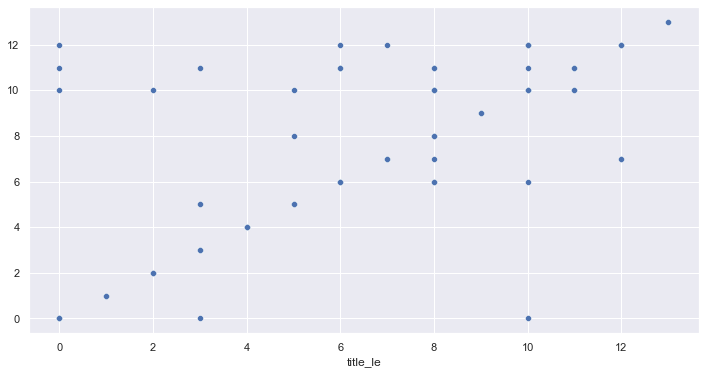

In [49]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,6)})
sns.scatterplot(y_test, y_pred)
plt.show()

In [50]:
input1 = 'Very creative and innovative person with ability to solve problems. Completed Msc in android development'
input_vect = vectorizer.transform([input1])
input_vect = input_vect.toarray()

output = logistic.predict(input_vect)

output = le.inverse_transform(output)

print(output)


['Android Developer']
